# lab 7

# Supermodeling

## What is supermodeling

## Used Data Assimilation method

## Submodels

## Lorenz again

![Lorenz equations](images/lorenz.png)

source: https://en.wikipedia.org/wiki/Lorenz_system

### Utilities

In [203]:
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline

In [522]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed


def plot_models(models, figsize=(8,8)):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection="3d")
    for piece in models:
            ax.plot(piece[:, 0].flatten(), piece[:, 1].flatten(), piece[:, 2].flatten(), lw=0.5)
    plt.draw()
    plt.show()
    
def plot_model(model, figsize=(5,5)):
    plot_models([model], figsize)

    
def calc_mean_lorenz(lorenz_models):
    return np.array([np.mean(lorenz_models[:,i,:], axis=0) for i in range(lorenz_models.shape[1])])


def calc_weighted_average_lorenz(lorenz_models, weights):
    return np.array([np.average(lorenz_models[:,i,:], axis=0, weights=weights) for i in range(lorenz_models.shape[1])])

# def lorenz_step(coords, parameters):
#     rho, sigma, beta = parameters
#     x, y, z = coords
#     return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

def lorenz_step(coords,parameters, d=dt):
    rho, sigma, beta = parameters
    x, y, z = coords
    return coords + (np.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])* dt)

def generate_lorenz(x=1, y=1, z=1, sigma=10.0, rho=28.0, beta=8.0/3.0, start=0.0, number_of_samples=2000):
    size = number_of_samples
    if start:
        size += ceil(start/dt)

    coords = np.empty([size,3])

    # Set initial values
    coords[0] = [x,y,z]
    parameters = [rho, sigma, beta]
    for i in range(size - 1):
        coords[i+1] = lorenz_step(coords[i],parameters,0.01)
    coords = coords[-number_of_samples:]

    return coords

# def generate_lorenz(x=1, y=1, z=1, sigma=10.0, rho=28.0, beta=8.0/3.0, start_time=0, number_of_samples=2000):
#     start_coords = [x, y, z]
#     parameters = [rho, sigma, beta]
#     dt = 0.02
#     stop = (number_of_samples+start_time)*dt
# #     t = np.linspace(start, stop, num=number_of_samples+(start_time/0.02))
#     t = np.arange(0.0, stop, dt)
    
#     model_coords = [np.array(start_coords)]
#     for i in range(1, int((start_time + number_of_samples) / dt)):
#         model_coords.append([model_coords[-1] + (np.array(lorenz_step(model_coords[-1], parameters)) * dt)])

#     return np.array(model_coords, t)

def plot_models_coords_in_time(models, timelines):
    f, (px, py, pz) = plt.subplots(3, 1, sharex=True, figsize=(15,8))

    px.set_ylabel("X component")
    py.set_ylabel("Y component")
    pz.set_ylabel("Z component")
    
    for ix, (model, timeline) in enumerate(zip(models, timelines)):
        px.plot(timeline, model[:,0], lw=0.5)
        py.plot(timeline, model[:,1], lw=0.5)
        pz.plot(timeline, model[:,2], lw=0.5, label=str(ix+1))

    pz.set_xlabel("Time index (x 100)")
    
    f.legend(title="Models in order")
    

def plot_model_coords_in_time(model, timeline):
    plot_models_coords_in_time([model], [timeline])

(100,)

### Sandbox

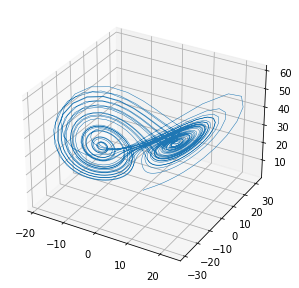

In [523]:
# generate and plot lorenz attractor
lorenz_attr = generate_lorenz()
plot_model(lorenz_attr)

In [513]:
model_coords = [np.array([1,1,1])]
model_coords.append([np.array(model_coords[-1]) + np.array(np.array(lorenz_step(model_coords[-1], [18.0, 7.0, 3.7])) * dt)])

In [514]:
model_coords

[array([1, 1, 1]), [array([1.   , 1.32 , 0.946])]]

In [378]:
model_1_params = dict(
    x = 1,
    y = 1,
    z = 1,
    sigma = 13.25,
    rho = 19.0,
    beta = 3.5
)

model_2_params = dict(
    x = 1,
    y = 1,
    z = 1,
    sigma = 7.0,
    rho = 18.0,
    beta = 3.7
)


model_3_params = dict(
    x = 1,
    y = 1,
    z = 1,
    sigma = 6.5,
    rho = 38.0,
    beta = 1.7
)

models_start = 15
number_of_samples = 200

m1, t1 = generate_lorenz(start_time=models_start, number_of_samples=number_of_samples,**model_1_params)
m2, t2 = generate_lorenz(start_time=models_start, number_of_samples=number_of_samples, **model_2_params)
m3, t3 = generate_lorenz(start_time=models_start, number_of_samples=number_of_samples, **model_3_params)

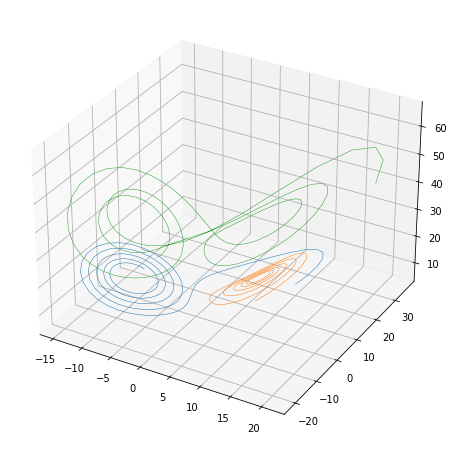

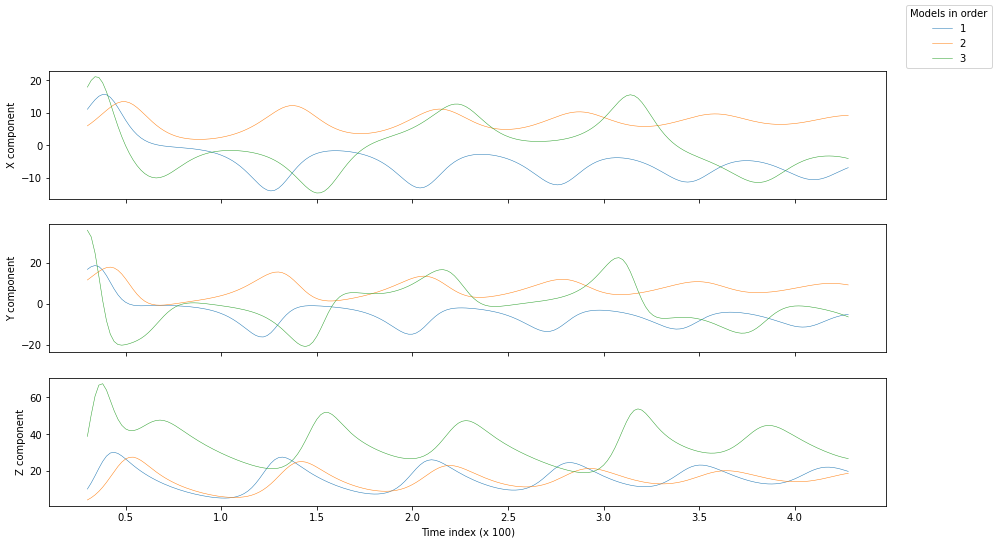

In [385]:
plot_models([m1,m2,m3])
plot_models_coords_in_time([m1,m2,m3], [t1,t2,t3])

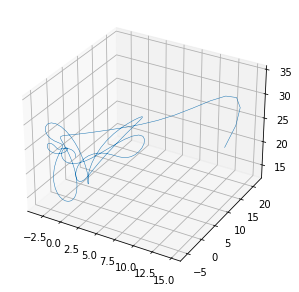

In [382]:
mean_model = calc_mean_lorenz(np.array([m1, m2, m3]))
plot_model(mean_model)

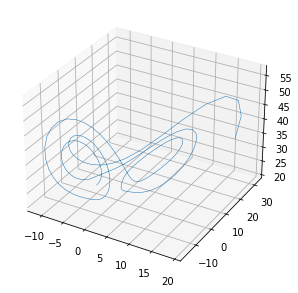

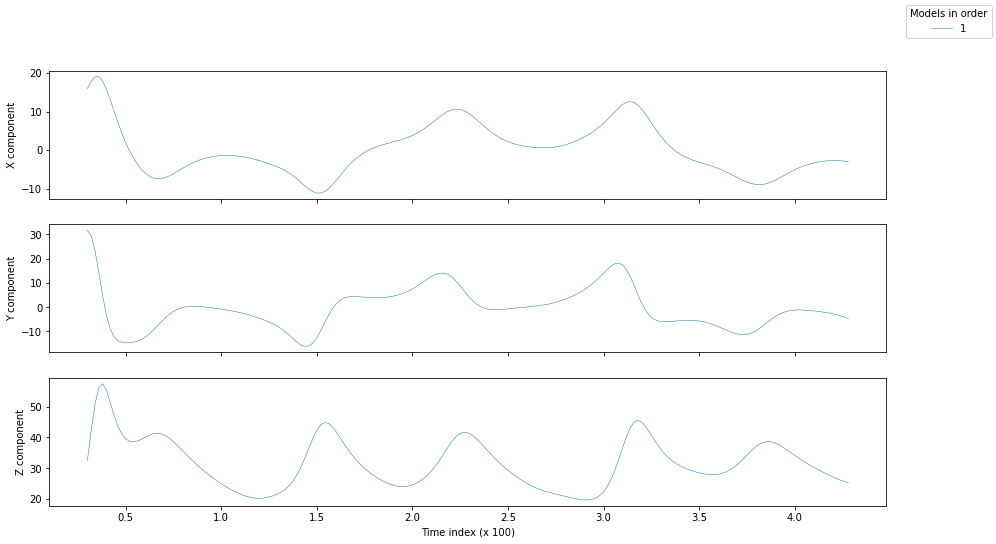

In [386]:
weighted_avg_model = calc_weighted_average_lorenz(
    np.array([m1, m2, m3]),
    [0.1,0.1,0.8]
)

plot_model(weighted_avg_model)
plot_model_coords_in_time(weighted_avg_model, t1)

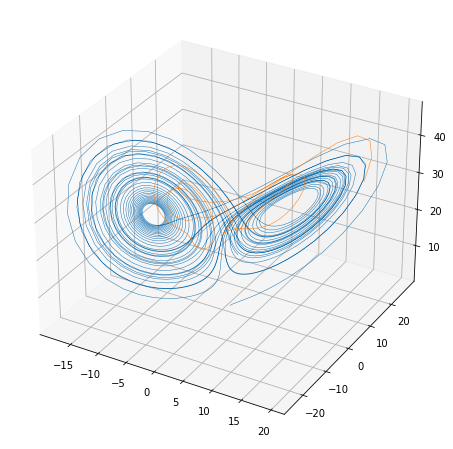

In [389]:
weighted_avg_model = calc_weighted_average_lorenz(
    np.array([m1, m2, m3]),
    [1,1,3]
)

plot_models([lorenz_attr,weighted_avg_model])

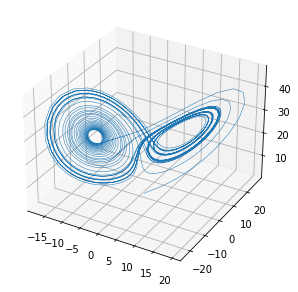

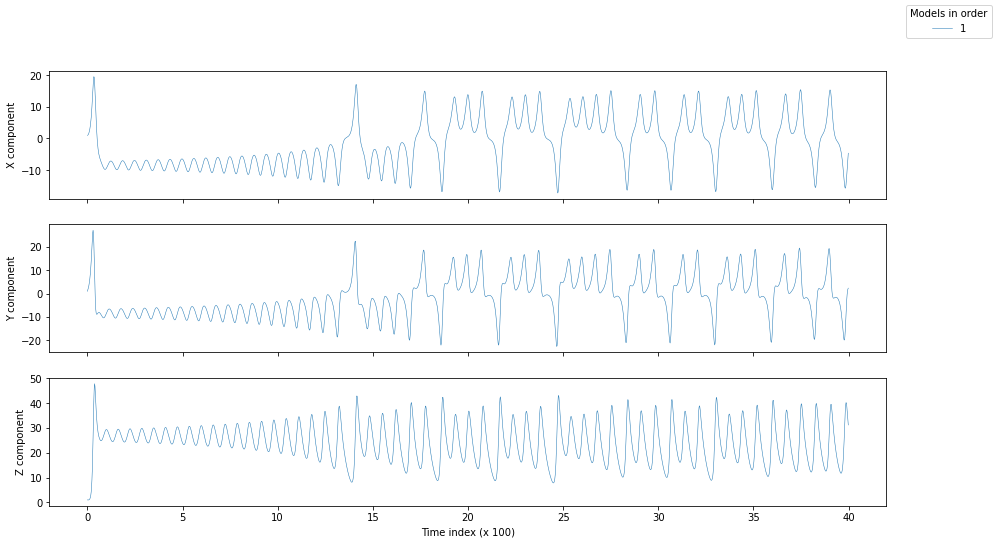

In [464]:
lorenz, lorenz_timeline = generate_lorenz()
plot_model(lorenz)
plot_model_coords_in_time(lorenz, lorenz_timeline)

## Task 1 - choose a fragment of lorenz 63 attractor

In [448]:
models_start = 800
number_of_samples = 200

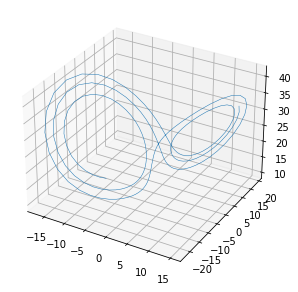

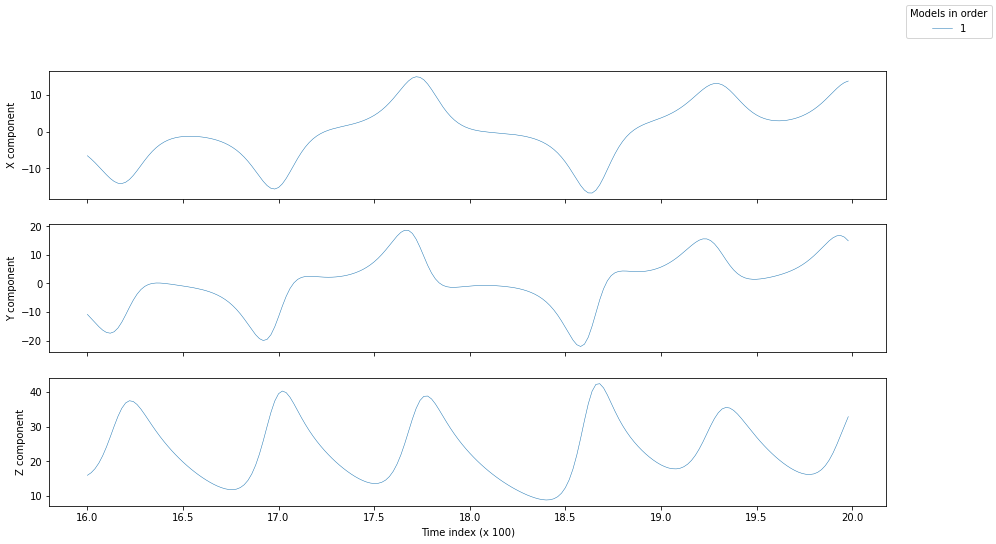

In [449]:
l63, l63_timeline = generate_lorenz(
    start_time=models_start, 
    number_of_samples=number_of_samples
)
plot_model(l63)
plot_model_coords_in_time(l63, l63_timeline)

## Task 2 - have fun with 4dvar

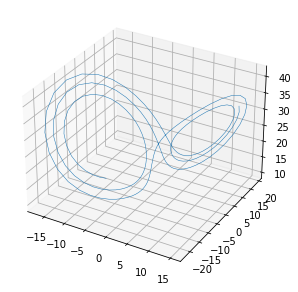

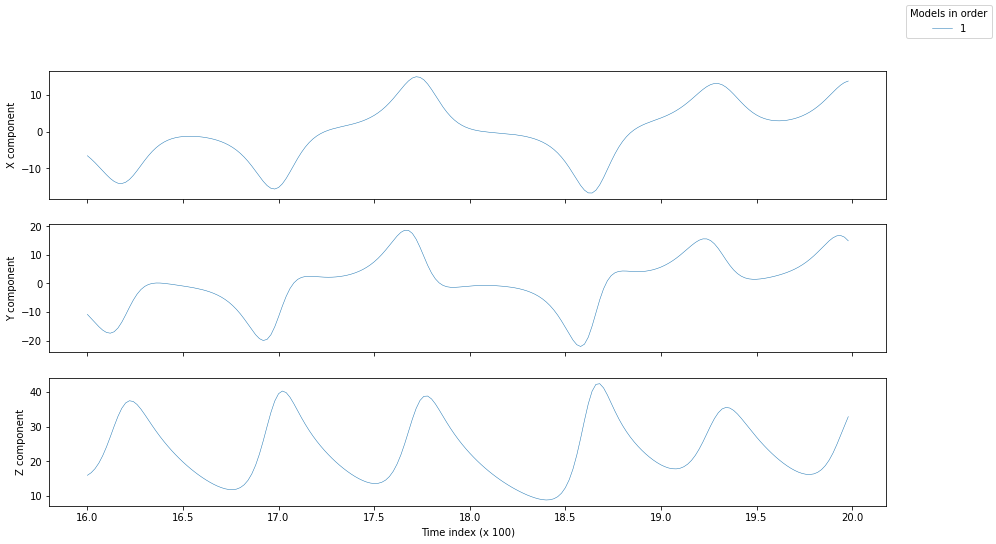

In [453]:
start_time = 0
number_of_samples = 200


l63_gt, l63_timeline_gt = generate_lorenz(
    x=l63[0][0],
    y=l63[0][1],
    z=l63[0][2],
    start_time=0, 
    number_of_samples=number_of_samples
)
plot_model(l63_gt)
plot_model_coords_in_time(l63_gt, l63_timeline_gt)

# l63_4dv, l63_4dv_timeline = train

In [450]:
l63.shape

(200, 3)

In [465]:
l63[0]

array([ -6.60090965, -10.83557962,  15.89065747])

In [488]:
np.vstack(([[1],[2],[3]],[[4],[5],[6]]))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])